![New Atlantis Ocean Datascience Fellowship Logo](https://i.postimg.cc/SxdJwDtG/Image-7-31-24-at-11-51-AM.jpg)

# XGBoost for Ocean Data Science Template

## Notebook Summary

This notebook serves as a basic template for building and deploying an XGBoost model in the context of ocean data science. It is designed for teams participating in the New Atlantis Ocean Datascience Fellowship program. The template provides a step-by-step guide to implement XGBoost, from data preprocessing to model evaluation and tuning.

## XGBoost: Key Properties and Design

XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting machines. Key properties include:

- Ensemble learning method using decision trees
- Sequential building of weak learners to create a strong predictor
- Optimized for speed and performance
- Handles missing data automatically
- Built-in regularization to prevent overfitting
- Supports both regression and classification tasks

## Pros and Cons of XGBoost

**Pros:**
- High predictive accuracy
- Efficient handling of large datasets
- Robust to outliers and missing data
- Feature importance ranking
- Flexibility in hyperparameter tuning

**Cons:**
- Can be prone to overfitting if not properly tuned
- Less interpretable than simpler models
- Computationally intensive for very large datasets
- Requires careful hyperparameter tuning for optimal performance

## When to Use XGBoost

XGBoost is particularly useful when:
- Dealing with structured/tabular data
- High predictive performance is a priority
- The dataset is of moderate to large size
- The problem involves complex, non-linear relationships
- Feature importance is of interest

It may not be the best choice when:
- Interpretability is the primary concern
- The dataset is extremely large and computational resources are limited
- The problem is simple and can be solved with a less complex model

In [1]:
# Install necessary libraries
!pip install shap

# Import necessary libraries
import numpy as np
import pandas as pd
import sklearn
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from IPython.display import clear_output
from sklearn.model_selection import GridSearchCV

# Un-comment once libs installing clean
# clear_output()

# Check XGBoost version
print(f"XGBoost version: {xgb.__version__}")

# Check other library versions
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"SHAP version: {shap.__version__}")

# Set up plotting styles
# plt.style.use('seaborn')
# sns.set_palette("viridis")

XGBoost version: 2.1.1
NumPy version: 1.26.4
Pandas version: 2.2.1
Scikit-learn version: 1.4.1.post1
SHAP version: 0.46.0


In [2]:
# Download the Titanic dataset
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

# Load the dataset into a Pandas DataFrame
raw_df = pd.read_csv('titanic.csv')
# Preprocess the data
def preprocess_data(df):
    # Handle missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)

    # Encode categorical variables
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])

    # Drop irrelevant columns
    df = df.drop('Name', axis=1)  # Add this line
    return df

# Preprocess and display the dataframe
df = preprocess_data(raw_df)
df.head()

C:\Users\joon4\AppData\Local\Temp\ipykernel_30368\2013826746.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


## Dataset Model: Titanic Passenger Data

For this template, we'll use the famous Titanic dataset as an example. While not directly related to ocean science, it provides a good structure for demonstrating XGBoost modeling techniques that can be applied to various ocean-related datasets.

### Dataset Overview

The Titanic dataset contains information about passengers aboard the RMS Titanic, which sank on its maiden voyage in 1912. The data includes various features about the passengers and whether they survived the disaster.

### Features

The dataset includes the following features:

- **Pclass**: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Name**: Passenger's name
- **Sex**: Passenger's sex
- **Age**: Passenger's age
- **Siblings/Spouses Aboard**: Number of siblings/spouses aboard
- **Parents/Children Aboard**: Number of parents/children aboard
- **Fare**: Passenger fare

### Target Variable

- **Survived**: Survival status (0 = Did not survive, 1 = Survived)

### Potential Ocean Science Applications

While this example uses the Titanic dataset, the techniques demonstrated can be applied to various ocean science datasets, such as:

1. Predicting marine species abundance based on environmental factors
2. Forecasting ocean temperature changes using historical data
3. Classifying types of marine habitats based on acoustic or visual data
4. Predicting the occurrence of harmful algal blooms
5. Estimating fish stock levels based on various ecological and fishing effort variables

When applying this template to your specific ocean science dataset, you'll replace the Titanic features with your relevant ocean data features, and adjust the target variable to match your prediction goal.

![XGBoost Logo](https://raw.githubusercontent.com/dmlc/dmlc.github.io/master/img/logo-m/xgboost.png)
## XGBoost Model Creation

XGBoost (eXtreme Gradient Boosting) is a powerful and efficient implementation of gradient boosting machines. It's known for its speed and performance, particularly with structured/tabular data. Let's explore how to set up and configure an XGBoost model.

### Basic XGBoost Setup

To create an XGBoost model, we typically follow these steps:

1. Import the XGBoost library
2. Prepare the data (features and target)
3. Create an XGBoost classifier or regressor
4. Set the hyperparameters
5. Train the model
6. Make predictions

### Key XGBoost Parameters

XGBoost has many parameters that can be tuned. Here are some of the most important ones:

- **max_depth**: Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. (default=6)
- **learning_rate**: Step size shrinkage used in update to prevents overfitting. (default=0.3)
- **n_estimators**: Number of gradient boosted trees. Equivalent to number of boosting rounds. (default=100)
- **subsample**: Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. (default=1)
- **colsample_bytree**: Subsample ratio of columns when constructing each tree. (default=1)
- **gamma**: Minimum loss reduction required to make a further partition on a leaf node of the tree. (default=0)
- **min_child_weight**: Minimum sum of instance weight (hessian) needed in a child. (default=1)

### Tuning XGBoost

While these default parameters often work well, it's usually beneficial to tune them for your specific dataset. Common methods for tuning include:

- Grid Search
- Random Search
- Bayesian Optimization

We'll explore hyperparameter tuning in a later section of this notebook. For a comprehensive guide to all XGBoost parameters and advanced usage, refer to the official XGBoost documentation:

[XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/)

Accuracy: 0.83
Feature Importances:
Pclass: 0.18379154801368713
Sex: 0.6008858680725098
Age: 0.05686478316783905
Siblings/Spouses Aboard: 0.06514552235603333
Parents/Children Aboard: 0.04316941648721695
Fare: 0.05014283210039139


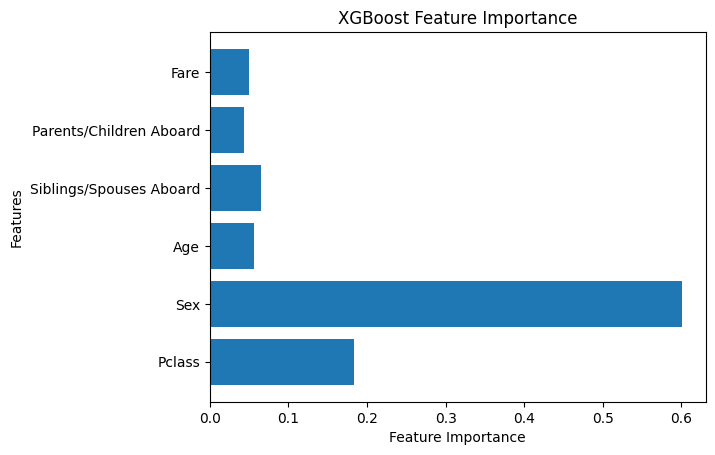

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def split_data(df):
  # Split features and target
  X = df.drop('Survived', axis=1)
  y = df['Survived']

  # Split into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

# Split the data
X_train, X_test, y_train, y_test = split_data(df)

# Create an XGBoost classifier
model = xgb.XGBClassifier(
    max_depth=3,  # Maximum depth of a tree
    learning_rate=0.1,  # Learning rate
    n_estimators=100,  # Number of trees
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    gamma=0,  # Minimum loss reduction required to make a further partition
    min_child_weight=1  # Minimum sum of instance weight needed in a child
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (example using accuracy)
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")

# Explore feature importance
feature_importances = model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

# Visualize feature importance
plt.barh(X_train.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()

---

![SHAP Logo](https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/shap_logo.png)
## (SHapley Additive exPlanations)

SHAP is a powerful Python library for interpreting machine learning models and explaining their predictions. It's based on game theory and provides a unified approach to explaining the output of any machine learning model.

### Key Features:

- **Model Agnostic**: Works with any machine learning model
- **Local and Global Explanations**: Provides both instance-level and model-level interpretations
- **Visualization Tools**: Offers various plots for intuitive understanding of model behavior

### Usage:

SHAP can be used to:
1. Explain individual predictions
2. Understand global model behavior
3. Identify feature importance
4. Visualize feature interactions

### Game Theory Connection:

SHAP is grounded in Shapley values from cooperative game theory. In this context:
- Features are treated as "players" in a game
- The prediction is the "payout"
- Shapley values determine how to fairly distribute the "payout" among the features

This approach allows SHAP to:
- Consider all possible feature combinations
- Account for feature interactions
- Provide consistent and locally accurate explanations

### Basic Implementation:

```python
import shap

# Assuming you have a trained model and a dataset X
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X)

# Visualize the results
shap.plots.waterfall(shap_values)

In [ ]:
# Explain the model's predictions using SHAP

# The 'explainer' allows you to connect to your trained model and compute / retrieve its SHAP values, regardless of the underlying model type!

explainer = shap.TreeExplainer(model, X_train)
shap_values = explainer(X_test)



# Create an "Explanation" SHAP object;

# This is simply an 'all - encompassing' data structure in SHAP that contains the SHAP values, base values, input feature data, feature names, and some additional
# information about the model / computations that may be needed by some plotting functions for more advanced visualizations

shap_values_explanation = shap.Explanation(shap_values.values, base_values=shap_values.base_values, data=X_test, feature_names=X_test.columns)

# The shap.initjs() function is used here to initialize JavaScript visualizations for our SHAP plots
shap.initjs()

### Local Interpretability

An amazing feature of the **shap** package is that it allows us to examine both the global *and* the local shap payout for each predictor variable in our model!

Below we use a SHAP 'force' and 'waterfall' plot to explain the prediction for the first instance in our data, as an example of analyzing the local shap values for our model.

Both of these plots are wonderful tools in examining the "payout" distributed to each predictor variable for a *single*, given observation.

In [111]:
# Visualize the first prediction's explanation
shap.plots.force(explainer.expected_value, shap_values[0].values, X_test.iloc[0, :])

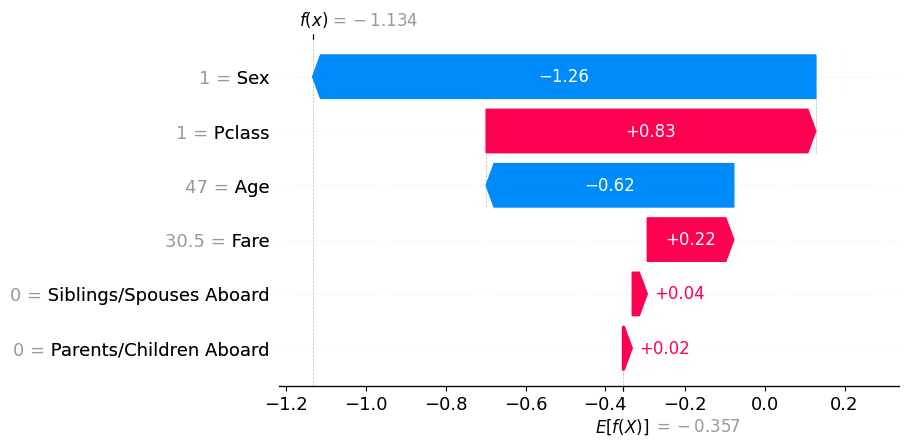

In [112]:
# Waterfall plot for a first instance
shap.waterfall_plot(shap_values_explanation[0])
plt.show()

One can observe that for this particular observation, having Sex = 1 was a major contribution to the model's prediction of this individual's overall lower probability of survival.

However, it appears that the model determined this individual's class grouping have a positive SHAP association with the individual's chance of survival.


### Global Interpretability



While this information is useful on an instance level, something else we are interested in is the way our predictor's payouts behave over the entire data set.

In order to analyze this information, we can use the "beeswarm" plot to display the SHAP values of every data instance for each feature as well as use color to visualize the value of said feature for each instance.



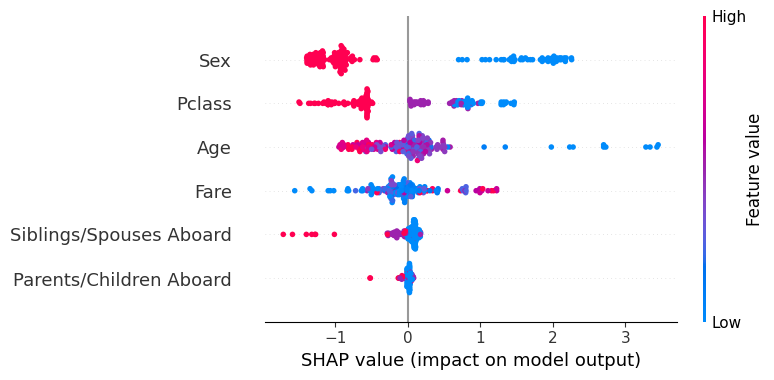

In [113]:
# Summarize the effects of all the features using a beeswarm plot
shap.summary_plot(shap_values, X_test)

Furthermore, we can make simple barplots to analyze the magnitude of the payout that each feature had over the whole dataset (in this case the mean magnitude)

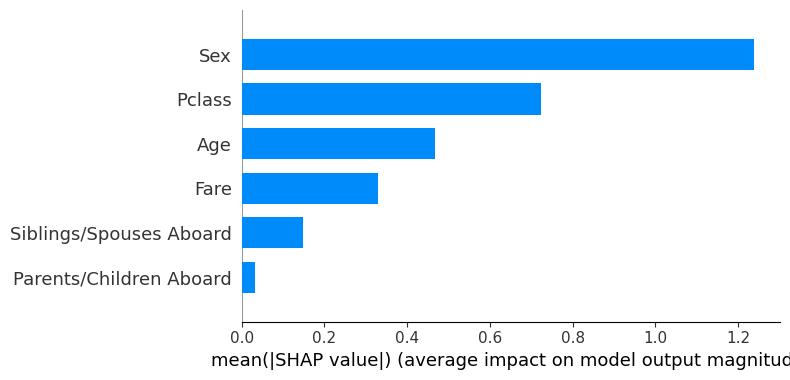

In [115]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

One more cool thing about SHAP visualizations is that they allow us to examine inter-predictor relationships even further! For instance, if

we were interested in whether belonging to Sex group 1 were associated with a higher chance of survival or a lower chance of survival in 3rd class, we could use a SHAP dependence 

visualize the change in SHAP values for the class of individuals interacting with their Sex group. We then observe how the SHAP values behave with respect to the Sex group for

class 3.

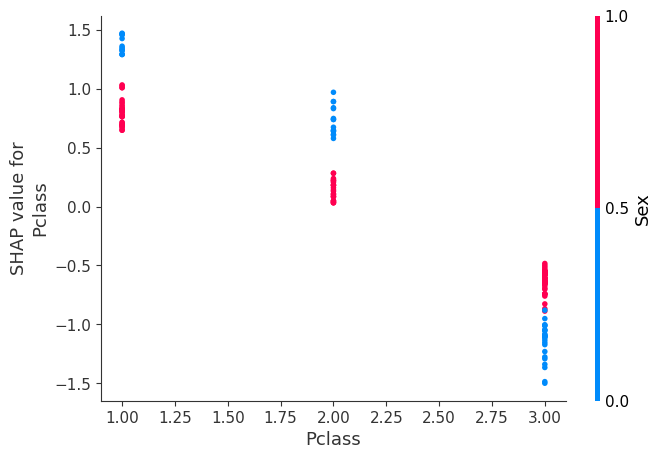

In [122]:
# Display the dependence plot for the variables Fare and Pclass
shap.dependence_plot("Pclass", shap_values.values, X_test, interaction_index="Sex")
plt.show()

As we can see, if an individual belonged to third class, although the shap values for each instance were negative (smaller chance of survival), belonging to Sex group 1 appears to have had a significant impact on the magnitude of the SHAP value for Pclass. So our model appears to have made the decision that although our chance of survival in this subgroup would be unfavorable, it would have been more unfavorable had we belonged to Sex group 0 in the same class.

---

## Hyperparameter Tuning with Grid Search

Hyperparameter tuning is a crucial step in optimizing machine learning models. It involves finding the best combination of hyperparameters that yield the highest model performance. For XGBoost, we'll focus on tuning three key parameters: `max_depth`, `learning_rate`, and `n_estimators`.

### Key Parameters:

1. **max_depth**:
   - Controls the maximum depth of each tree in the ensemble.
   - Deeper trees can capture more complex patterns but may lead to overfitting.
   - Shallower trees are simpler and may generalize better.

2. **learning_rate** (also known as eta):
   - Scales the contribution of each tree in the ensemble.
   - Lower values make the model more robust by shrinking the contribution of each tree.
   - Higher values may lead to overfitting but can sometimes yield better performance.

3. **n_estimators**:
   - Determines the number of trees in the ensemble.
   - More trees can potentially capture more complex patterns.
   - Too many trees may lead to overfitting and increased computational cost.

### Grid Search Process:

Grid search is an exhaustive search through a manually specified subset of the hyperparameter space. Here's how it works:

1. Define a range of values for each hyperparameter.
2. Create all possible combinations of these values.
3. Train a model for each combination.
4. Evaluate each model using cross-validation.
5. Select the best performing combination.


In [ ]:
# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Create a new model with the best parameters
best_model = xgb.XGBClassifier(**best_params)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = (y_pred_best == y_test).mean()
print(f"Accuracy with Best Parameters: {accuracy_best:.2f}")